# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [37]:
raw_data = pd.read_csv('iris-dataset.csv')

In [38]:
#showing first 5 row of our data can be helpful

raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
#working on the copy data

df = raw_data.copy()

In [40]:
#type of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

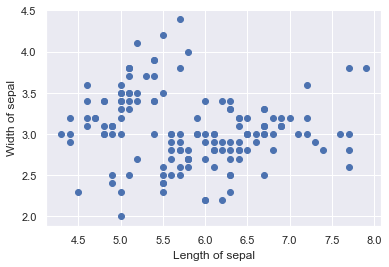

In [41]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [42]:
x = df.copy()

kmeans = KMeans(2)

kmeans.fit(x)

KMeans(n_clusters=2)

In [43]:
clusters = df.copy()

clusters['clusters_prediction'] = kmeans.fit_predict(x)

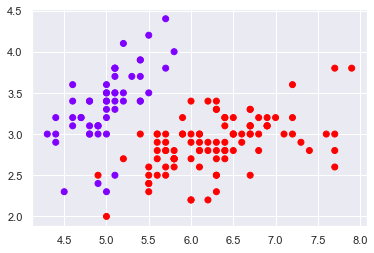

In [44]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['clusters_prediction'], cmap = 'rainbow')

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [45]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(df)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [46]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [47]:
clusters_scaled = df.copy()

clusters_scaled['cl_scld_pred'] = kmeans_scaled.fit_predict(x_scaled)

In [48]:
clusters_scaled

,sepal_length,sepal_width,petal_length,petal_width,cl_scld_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


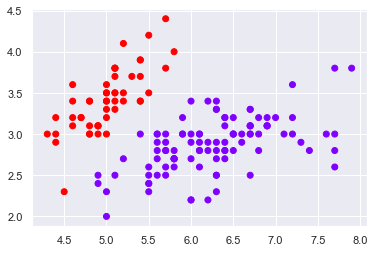

In [49]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cl_scld_pred'], cmap = 'rainbow')

## Take Advantage of the Elbow Method

### WCSS

In [50]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

D:\asd\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[600.0,
 223.73200573676345,
 141.14145998036577,
 114.5651868525893,
 91.06677122728536,
 81.79832578024227,
 71.95812796906716,
 63.25945609407894,
 54.279578402961754]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

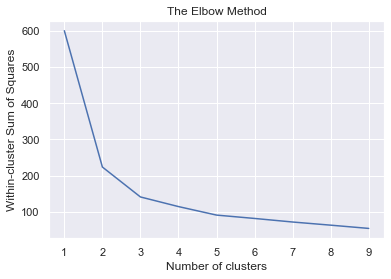

In [51]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

How many clusters are there?

# It seem 2 or 3 clusters are the best

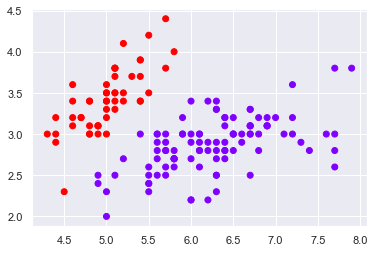

In [53]:
## 2 clusters

kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

clusters_scaled = df.copy()

clusters_scaled['cl_scld_pred'] = kmeans_scaled.fit_predict(x_scaled)

plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cl_scld_pred'], cmap = 'rainbow')


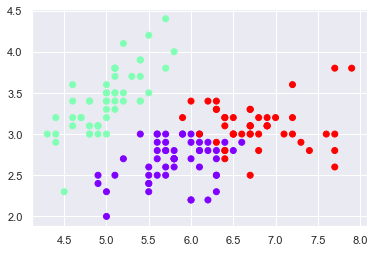

In [66]:
## 3 clusters

kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)

clusters_scaled_3 = df.copy()

clusters_scaled_3['cl_scld_pred'] = kmeans_scaled.fit_predict(x_scaled)

plt.scatter(clusters_scaled_3['sepal_length'], clusters_scaled_3['sepal_width'], c= clusters_scaled_3['cl_scld_pred'], cmap = 'rainbow')


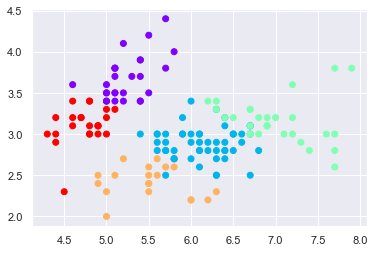

In [55]:
# 5 clusters


kmeans_scaled = KMeans(5)
kmeans_scaled.fit(x_scaled)

clusters_scaled = df.copy()

clusters_scaled['cl_scld_pred'] = kmeans_scaled.fit_predict(x_scaled)

plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cl_scld_pred'], cmap = 'rainbow')


# Comparision 

In [59]:
real_data = pd.read_csv('iris-with-answers-Copy1.csv')

real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [60]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:
real_data['species'] = real_data['species'].map({'setosa': 0 , 'versicolor':1 , 'virginica': 2})

In [62]:
real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0, 0.5, 'Width of sepal')

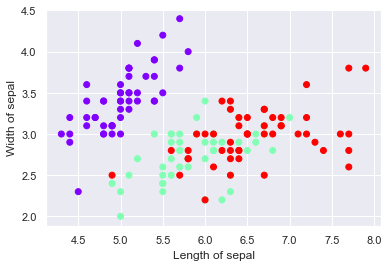

In [64]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')

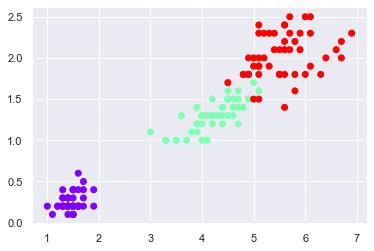

In [65]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')

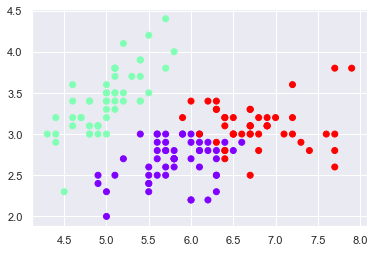

In [68]:
plt.scatter(clusters_scaled_3['sepal_length'], clusters_scaled_3['sepal_width'], c= clusters_scaled_3['cl_scld_pred'], cmap = 'rainbow')